[Github](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson4-collab.ipynb)

In [0]:
# !wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
# !python -m zipfile -e ml-100k.zip .
# !rm ml-100k.zip

In [0]:
import numpy as np
import pandas as pd
import torch
import fastai
from fastai import collab
from fastai import tabular

In [0]:
user, item, title = 'userId', 'movieId', 'title'

In [3]:
path = tabular.Path('ml-100k/')
path

PosixPath('ml-100k')

In [4]:
path.ls()

[PosixPath('ml-100k/mku.sh'),
 PosixPath('ml-100k/u1.test'),
 PosixPath('ml-100k/u.user'),
 PosixPath('ml-100k/ua.base'),
 PosixPath('ml-100k/u4.test'),
 PosixPath('ml-100k/u1.base'),
 PosixPath('ml-100k/u.item'),
 PosixPath('ml-100k/u2.test'),
 PosixPath('ml-100k/u.occupation'),
 PosixPath('ml-100k/u.genre'),
 PosixPath('ml-100k/u5.test'),
 PosixPath('ml-100k/u2.base'),
 PosixPath('ml-100k/u.info'),
 PosixPath('ml-100k/ub.base'),
 PosixPath('ml-100k/README'),
 PosixPath('ml-100k/u3.test'),
 PosixPath('ml-100k/u4.base'),
 PosixPath('ml-100k/u.data'),
 PosixPath('ml-100k/ub.test'),
 PosixPath('ml-100k/u3.base'),
 PosixPath('ml-100k/u5.base'),
 PosixPath('ml-100k/allbut.pl'),
 PosixPath('ml-100k/ua.test')]

In [5]:
ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=[user,item,'rating','timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
movies = pd.read_csv(path/'u.item',  delimiter='|', encoding='latin-1', header=None,
                    names=[item, 'title', 'date', 'N', 'url', *[f'g{i}' for i in range(19)]])
movies.head()

,movieId,title,date,N,url,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [7]:
rating_movie = ratings.merge(movies[[item, title]])
rating_movie.head()

,userId,movieId,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [0]:
data = collab.CollabDataBunch.from_df(rating_movie, valid_pct=0.1, 
                                      item_name=title, seed=111)
y_range = [0, 5.5]

In [9]:
data.show_batch()

userId,title,target
363,Tomorrow Never Dies (1997),1.0
305,C'est arrivé près de chez vous (1992),4.0
480,Liar Liar (1997),1.0
405,Love Affair (1994),1.0
840,"Grifters, The (1990)",4.0


In [0]:
learner = collab.collab_learner(data, n_factors=40, y_range=y_range, wd=2e-1)

In [11]:
learner.model

EmbeddingDotBias(
  (u_weight): Embedding(944, 40)
  (i_weight): Embedding(1654, 40)
  (u_bias): Embedding(944, 1)
  (i_bias): Embedding(1654, 1)
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


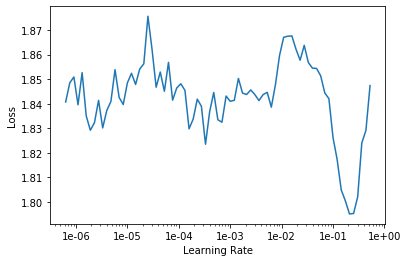

In [12]:
learner.lr_find()
learner.recorder.plot(skip_end=15)

In [13]:
learner.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,time
0,0.972626,0.949159,00:08
1,0.924986,0.896968,00:08
2,0.830400,0.830321,00:08
3,0.733544,0.810148,00:08


In [0]:
learner.save('dotprod')

In [0]:
_ = learner.load('dotprod')